In [12]:
import numpy as np
from scipy.special import wofz
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from sympy import *

In [13]:
init_printing(use_unicode=False, wrap_line=False)

## Lorentz

In [14]:
def lorentz(x, gamma):
    return 1 / (gamma**2 + x**2)

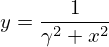

In [15]:
y, x, gamma = symbols("y x gamma", real=True)
Eq(y, lorentz(x, gamma))

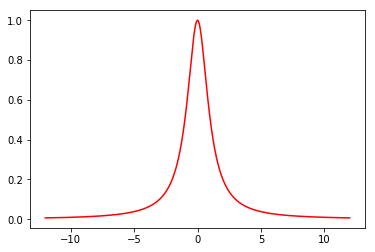

In [62]:
x = np.arange(-12.0, 12.0, 0.01)
yL = lorentz(x, 1.0)
plt.plot(x, yL, "-r")

In [28]:
yL

array([0.00689655, 0.00690798, 0.00691944, ..., 0.00693092, 0.00691944,
       0.00690798])

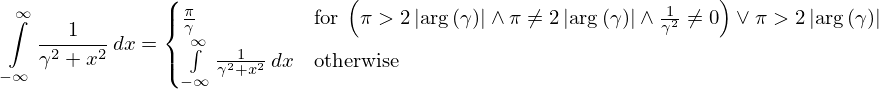

In [17]:
# in case we'll need to normalize
x, gamma = symbols("x gamma", real=True)
L_norm = Integral(lorentz(x, gamma), (x, -oo, oo))
Eq(L_norm, L_norm.doit())

## Gauss

In [57]:
def gauss_(x, sigma):
    return np.exp(-np.square(x) / (2 * np.square(sigma)))

In [58]:
y, x, sigma = symbols("y x sigma", real=True)
Eq(y, gauss_(x, sigma))

AttributeError: 'Mul' object has no attribute 'exp'

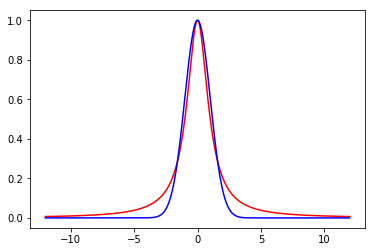

In [64]:
yG = gauss_(x, 1.0)
plt.plot(x, yL, "-r")
plt.plot(x, yG, "-b")

In [34]:
yG

 [-72.0  -71.88005  -71.7602  -71.64045  -71.5208  -71.40125  -71.2818  -71.16245  -71.0432  -70.92405  -70.805  -70.68605  -70.5672  -70.44845  -70.3298  -70.21125  -70.0928  -69.97445  -69.8562  -69.73805  -69.62  -69.5020500000001  -69.3842  -69.2664500000001  -69.1488000000001  -69.0312500000001  -68.9138000000001  -68.7964500000001  -68.6792000000001  -68.5620500000001  -68.4450000000001  -68.3280500000001  -68.2112000000001  -68.0944500000001  -67.9778000000001  -67.8612500000001  -67.7448000000001  -67.6284500000001  -67.5122000000001  -67.3960500000001  -67.2800000000001  -67.1640500000001  -67.0482000000001  -66.9324500000001  -66.8168000000001  -66.7012500000001  -66.5858000000001  -66.4704500000001  -66.3552000000001  -66.2400500000001  -66.1250000000001  -66.0100500000001  -65.8952000000001  -65.7804500000001  -65.6658000000001  -65.5512500000001  -65.4368000000001  -65.3224500000001  -65.2082000000001  -65.0940500000001  -64.9800000000001  -64.8660500000001  -64.7522000000

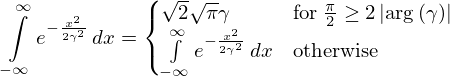

In [37]:
# in case we'll need to normalize
x, sigma = symbols("x sigma", real=True)
G_norm = Integral(gauss_(x, gamma), (x, -oo, oo))
Eq(G_norm, G_norm.doit())

In [38]:
%%latex
So a normalized Gaussian is:
$$ G(x; \sigma) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{x^2}{2 \sigma^2}} $$

<IPython.core.display.Latex object>

In [39]:
%%latex
The Voigt profile is defined by by a convolution of a Cauchy-Lorentz distribution and a Gaussian distribution:
$$ V(x;\sigma,\gamma) \equiv \int_{-\infty}^\infty G(x';\sigma)L(x-x';\gamma)\, dx' $$
this can be evaluated by a special case of the Faddeeva function w(z):
$$ V(x;\sigma,\gamma)=\frac{\operatorname{Re}[w(z)]}{\sigma\sqrt{2 \pi}} $$
where:
$$ z=\frac{x+i\gamma}{\sigma\sqrt{2}} $$

<IPython.core.display.Latex object>

In [43]:
def voigt(x, sigma, gamma):
    return np.real(wofz((x + 1j * gamma) / (sigma * np.sqrt(2)))) / (
        sigma * np.sqrt(2 * np.pi)
    )

In [44]:
x = np.arange(-12.0, 12.0, 0.01)
yL = lorentz(x, 1.0)
yG = gauss(x, 1.0)
yV = voigt(x, 1.0, 1.0)

ValueError: x and y must have same first dimension, but have shapes (2400,) and (1,)

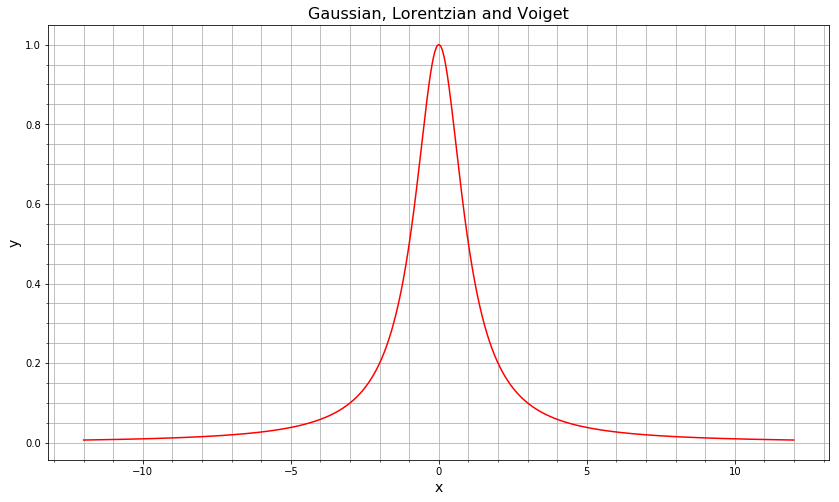

In [45]:
plt.close("all")
fig, ax = plt.subplots(figsize=(14, 8))
ax.grid(b=True, which="both", axis="both")
ax.minorticks_on()
ax.set_title("Gaussian, Lorentzian and Voiget", fontsize=16)
ax.set_xlabel("x", fontsize=14)
# ax.set_xlim()
ax.set_ylabel("y", fontsize=14)
# ax.set_ylim()
ax.plot(x, yL, "-r")
ax.plot(x, yG, "-b")
ax.plot(x, yV, "-g")
plt.show()